In [69]:
import scipy
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
#import yasa
from sklearn.pipeline import Pipeline
#from mne.decoding import CSP
from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import Linear DiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import keras
from keras import Sequential
from keras.layers import *










In [7]:
matrixodb = scipy.io.loadmat('./data/P1_odb.mat')
matrixstd = scipy.io.loadmat('./data/P1_std.mat')
P1odb = pd.DataFrame.from_dict(matrixodb['E_odb'])
P1std = pd.DataFrame.from_dict(matrixstd['E_std'])
P1odb['trig'] = np.ones((150))*1

In [8]:
P1std['trig'] = np.ones((1050))*-1

In [9]:
P1std

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,trig
0,13.841465,14.016478,13.608346,13.076333,13.132714,14.334297,16.733438,19.768959,22.448285,23.726450,...,-0.619062,-0.784734,-0.962076,-0.908263,-0.382244,0.731054,2.330177,4.110266,5.700409,-1.0
1,-8.026854,-8.770455,-10.028952,-11.142821,-11.614986,-11.369499,-10.746711,-10.268088,-10.339574,-11.062575,...,0.504484,2.032739,3.044166,3.268503,2.679951,1.502920,0.152074,-0.872152,-1.128146,-1.0
2,-0.421857,-1.487404,-1.908706,-1.350003,0.246942,2.630587,5.339121,7.865506,9.809033,10.968539,...,-5.011193,-4.826156,-4.194591,-3.471207,-3.064030,-3.214106,-3.860626,-4.665490,-5.185175,-1.0
3,-5.354894,-8.259110,-10.150105,-11.017689,-11.206920,-11.224907,-11.486142,-12.116610,-12.915523,-13.496702,...,0.926762,2.275507,2.962968,2.708990,1.620352,0.131075,-1.208070,-1.972975,-2.031624,-1.0
4,7.557720,9.563675,10.701182,10.909864,10.404051,9.558844,8.761528,8.281632,8.196336,8.393342,...,2.998839,0.689092,-1.862000,-4.025903,-5.248569,-5.254004,-4.139067,-2.305283,-0.257718,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1.357398,2.466432,3.558555,4.602108,5.521307,6.151947,6.277707,5.745943,4.594575,3.091907,...,7.450555,5.842030,3.411766,0.447377,-2.688073,-5.615070,-8.020919,-9.732377,-10.736813,-1.0
1046,-3.983711,-1.561955,-0.136934,0.471325,0.713084,1.160406,2.274150,4.187171,6.613048,8.939756,...,3.694667,4.529326,4.850862,4.748793,4.344344,3.773124,3.173643,2.665061,2.308758,-1.0
1047,10.598088,8.620539,5.841647,2.932392,0.648451,-0.444166,-0.207855,1.003663,2.509650,3.610863,...,-10.984124,-9.771764,-7.984591,-6.095288,-4.406061,-2.954964,-1.524098,0.250010,2.701372,-1.0
1048,-1.867614,-2.330385,-2.432316,-2.346067,-2.236152,-2.212695,-2.310735,-2.489244,-2.652670,-2.693350,...,1.506468,2.015058,3.189184,4.744303,6.332323,7.623258,8.387483,8.556573,8.239670,-1.0


In [20]:
df = pd.concat([P1odb, P1std[:150]])

In [21]:
df_shuffled = df.sample(frac=1, random_state=0)

In [22]:
df_shuffled

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,trig
58,16.698593,15.510970,13.428503,10.596344,7.353388,4.126155,1.329242,-0.710311,-1.816214,-2.013299,...,-0.650530,-0.223272,0.429985,1.321030,2.273486,2.992694,3.244498,3.025560,2.610225,-1.0
38,5.577370,6.788708,7.437758,7.441143,6.792380,5.554695,3.854287,1.853852,-0.282336,-2.405977,...,0.860546,3.871240,6.496593,7.976019,7.715852,5.596432,2.132859,-1.635657,-4.519054,-1.0
12,-8.982438,-8.160075,-6.726506,-4.851311,-2.617586,-0.172493,2.164200,3.948484,4.788341,4.524074,...,-10.198311,-9.391767,-7.701882,-5.446676,-3.051563,-0.876675,0.899796,2.286692,3.411331,1.0
71,-7.441651,-5.895734,-3.711649,-1.503413,0.134588,0.833375,0.566466,-0.377180,-1.572462,-2.721916,...,4.146202,3.791434,3.114345,2.328176,1.762922,1.755584,2.526042,4.081563,6.182592,-1.0
89,-5.651894,-3.582574,-0.947415,1.939962,4.725315,7.090176,8.741288,9.342631,8.480465,5.743644,...,-6.784328,-6.342064,-5.905384,-5.352083,-4.686168,-3.983064,-3.279095,-2.508212,-1.555614,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,8.368321,8.989989,9.691307,10.031623,9.567975,8.063017,5.628908,2.736570,0.075177,-1.684154,...,-8.828207,-7.503262,-5.519452,-3.044536,-0.417649,1.901667,3.487873,4.128493,3.922812,-1.0
42,-14.468827,-14.419576,-14.584207,-14.779534,-14.624085,-13.802181,-12.319679,-10.578048,-9.203014,-8.713033,...,-1.726343,-0.260160,0.637416,1.117508,1.521591,2.188256,3.279249,4.722788,6.317880,-1.0
117,-1.709495,-0.408406,0.282815,0.271251,-0.346480,-1.271454,-2.050514,-2.195548,-1.364820,0.454382,...,-0.341020,0.893635,2.718026,5.065439,7.636601,9.921557,11.348936,11.522664,10.427862,1.0
47,0.675938,1.233402,1.714919,2.024559,2.113702,1.995210,1.742043,1.438434,1.091926,0.577868,...,-13.234722,-13.420134,-14.262429,-15.064783,-15.233342,-14.561561,-13.313310,-12.074440,-11.469536,1.0


In [23]:
X = df_shuffled.loc[:, df_shuffled.columns != 'trig'].to_numpy()
y = df_shuffled['trig'].to_numpy()



In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1, stratify=y)


model = Sequential([Dense(1600, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(100, activation = 'relu', name = 'encoder'),
Dense(1000, activation = 'relu'),
Dense(1600)])


model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae','acc'])

history = model.fit(x_train, x_train, epochs = 1000, batch_size = 256)

extractor = keras.Model(inputs=model.inputs,
                        outputs=model.layers['encoder'])
features = extractor(data)



Epoch 1/1000
1/1 [==============================] - 0s 480ms/step - loss: 138.6418 - mae: 8.3247 - acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 30ms/step - loss: 135.1835 - mae: 8.2042 - acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 43ms/step - loss: 131.1849 - mae: 8.1219 - acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 128.0516 - mae: 8.0667 - acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 37ms/step - loss: 122.5810 - mae: 7.9274 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 41ms/step - loss: 118.3298 - mae: 7.8189 - acc: 0.0042
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss: 114.4475 - mae: 7.7113 - acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 42ms/step - loss: 110.9147 - mae: 7.6055 - acc: 0.0042
Epoch 9/1000
1/1 [==============================] - 0s 40ms/step - loss: 106.8513 - mae: 7.4813

1/1 [==============================] - 0s 45ms/step - loss: 17.1207 - mae: 3.1680 - acc: 0.2208
Epoch 76/1000
1/1 [==============================] - 0s 56ms/step - loss: 16.2311 - mae: 3.0714 - acc: 0.2375
Epoch 77/1000
1/1 [==============================] - 0s 46ms/step - loss: 16.3128 - mae: 3.0899 - acc: 0.2333
Epoch 78/1000
1/1 [==============================] - 0s 37ms/step - loss: 15.6243 - mae: 3.0155 - acc: 0.2417
Epoch 79/1000
1/1 [==============================] - 0s 32ms/step - loss: 15.2278 - mae: 2.9762 - acc: 0.2458
Epoch 80/1000
1/1 [==============================] - 0s 35ms/step - loss: 15.0083 - mae: 2.9566 - acc: 0.2375
Epoch 81/1000
1/1 [==============================] - 0s 30ms/step - loss: 14.3874 - mae: 2.8873 - acc: 0.2708
Epoch 82/1000
1/1 [==============================] - 0s 34ms/step - loss: 14.2140 - mae: 2.8740 - acc: 0.2708
Epoch 83/1000
1/1 [==============================] - 0s 31ms/step - loss: 13.7508 - mae: 2.8221 - acc: 0.2583
Epoch 84/1000
1/1 [=====

1/1 [==============================] - 0s 38ms/step - loss: 2.7321 - mae: 1.2435 - acc: 0.5208
Epoch 150/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.0229 - mae: 1.3295 - acc: 0.5042
Epoch 151/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.5338 - mae: 1.4628 - acc: 0.5208
Epoch 152/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.7884 - mae: 1.5262 - acc: 0.5167
Epoch 153/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.1023 - mae: 1.3643 - acc: 0.5417
Epoch 154/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2796 - mae: 1.1186 - acc: 0.5417
Epoch 155/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.6321 - mae: 1.2356 - acc: 0.5542
Epoch 156/1000
1/1 [==============================] - 0s 52ms/step - loss: 2.8085 - mae: 1.2945 - acc: 0.5583
Epoch 157/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.1965 - mae: 1.1081 - acc: 0.5542
Epoch 158/1000
1/1 [=====

1/1 [==============================] - 0s 44ms/step - loss: 0.4863 - mae: 0.5166 - acc: 0.6833
Epoch 224/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4477 - mae: 0.4907 - acc: 0.6667
Epoch 225/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4501 - mae: 0.4917 - acc: 0.6750
Epoch 226/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4338 - mae: 0.4832 - acc: 0.6625
Epoch 227/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3930 - mae: 0.4514 - acc: 0.6708
Epoch 228/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4115 - mae: 0.4686 - acc: 0.6625
Epoch 229/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3904 - mae: 0.4540 - acc: 0.6792
Epoch 230/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.3669 - mae: 0.4351 - acc: 0.6833
Epoch 231/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.3679 - mae: 0.4386 - acc: 0.6708
Epoch 232/1000
1/1 [=====

1/1 [==============================] - 0s 42ms/step - loss: 0.1481 - mae: 0.2946 - acc: 0.8083
Epoch 298/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.1062 - mae: 0.2443 - acc: 0.7958
Epoch 299/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0832 - mae: 0.2082 - acc: 0.7917
Epoch 300/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1119 - mae: 0.2524 - acc: 0.8000
Epoch 301/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1064 - mae: 0.2457 - acc: 0.7875
Epoch 302/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0766 - mae: 0.1987 - acc: 0.8167
Epoch 303/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0842 - mae: 0.2141 - acc: 0.8000
Epoch 304/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0958 - mae: 0.2324 - acc: 0.8042
Epoch 305/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0762 - mae: 0.2014 - acc: 0.8042
Epoch 306/1000
1/1 [=====

1/1 [==============================] - 0s 45ms/step - loss: 0.0671 - mae: 0.2038 - acc: 0.8500
Epoch 372/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1293 - mae: 0.2827 - acc: 0.8500
Epoch 373/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.1697 - mae: 0.3228 - acc: 0.8375
Epoch 374/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1097 - mae: 0.2600 - acc: 0.8417
Epoch 375/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0404 - mae: 0.1566 - acc: 0.8750
Epoch 376/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0614 - mae: 0.1944 - acc: 0.8625
Epoch 377/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.1137 - mae: 0.2652 - acc: 0.8792
Epoch 378/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0985 - mae: 0.2461 - acc: 0.8583
Epoch 379/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0423 - mae: 0.1604 - acc: 0.8750
Epoch 380/1000
1/1 [=====

1/1 [==============================] - 0s 44ms/step - loss: 0.0345 - mae: 0.1451 - acc: 0.9125
Epoch 446/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0161 - mae: 0.0989 - acc: 0.9375
Epoch 447/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0083 - mae: 0.0691 - acc: 0.9542
Epoch 448/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0206 - mae: 0.1120 - acc: 0.9208
Epoch 449/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0240 - mae: 0.1203 - acc: 0.9375
Epoch 450/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0118 - mae: 0.0831 - acc: 0.9292
Epoch 451/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0070 - mae: 0.0642 - acc: 0.9500
Epoch 452/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0150 - mae: 0.0972 - acc: 0.9417
Epoch 453/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0174 - mae: 0.1043 - acc: 0.9167
Epoch 454/1000
1/1 [=====

1/1 [==============================] - 0s 38ms/step - loss: 0.0071 - mae: 0.0656 - acc: 0.9542
Epoch 520/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0062 - mae: 0.0613 - acc: 0.9583
Epoch 521/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0069 - mae: 0.0650 - acc: 0.9667
Epoch 522/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0089 - mae: 0.0742 - acc: 0.9458
Epoch 523/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0100 - mae: 0.0793 - acc: 0.9750
Epoch 524/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0113 - mae: 0.0851 - acc: 0.9417
Epoch 525/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0148 - mae: 0.0977 - acc: 0.9625
Epoch 526/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0203 - mae: 0.1146 - acc: 0.9417
Epoch 527/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0268 - mae: 0.1321 - acc: 0.9625
Epoch 528/1000
1/1 [=====

1/1 [==============================] - 0s 41ms/step - loss: 0.0143 - mae: 0.0936 - acc: 0.9750
Epoch 594/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0200 - mae: 0.1118 - acc: 0.9417
Epoch 595/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0287 - mae: 0.1354 - acc: 0.9542
Epoch 596/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0437 - mae: 0.1670 - acc: 0.9417
Epoch 597/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0673 - mae: 0.2079 - acc: 0.9375
Epoch 598/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.1062 - mae: 0.2606 - acc: 0.9042
Epoch 599/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1655 - mae: 0.3262 - acc: 0.9000
Epoch 600/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.2646 - mae: 0.4116 - acc: 0.8625
Epoch 601/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4022 - mae: 0.5104 - acc: 0.8458
Epoch 602/1000
1/1 [=====

1/1 [==============================] - 0s 36ms/step - loss: 0.0114 - mae: 0.0828 - acc: 0.9708
Epoch 668/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0154 - mae: 0.0961 - acc: 0.9542
Epoch 669/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0208 - mae: 0.1114 - acc: 0.9583
Epoch 670/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0285 - mae: 0.1305 - acc: 0.9542
Epoch 671/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0407 - mae: 0.1558 - acc: 0.9458
Epoch 672/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0586 - mae: 0.1869 - acc: 0.9208
Epoch 673/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0851 - mae: 0.2244 - acc: 0.9292
Epoch 674/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1226 - mae: 0.2692 - acc: 0.9000
Epoch 675/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.1775 - mae: 0.3237 - acc: 0.8750
Epoch 676/1000
1/1 [=====

1/1 [==============================] - 0s 41ms/step - loss: 0.0017 - mae: 0.0324 - acc: 0.9833
Epoch 742/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0021 - mae: 0.0363 - acc: 0.9917
Epoch 743/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0025 - mae: 0.0396 - acc: 0.9792
Epoch 744/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0026 - mae: 0.0398 - acc: 0.9917
Epoch 745/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0029 - mae: 0.0421 - acc: 0.9958
Epoch 746/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0042 - mae: 0.0500 - acc: 0.9708
Epoch 747/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0062 - mae: 0.0607 - acc: 0.9833
Epoch 748/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0088 - mae: 0.0726 - acc: 0.9667
Epoch 749/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0128 - mae: 0.0885 - acc: 0.9792
Epoch 750/1000
1/1 [=====

1/1 [==============================] - 0s 43ms/step - loss: 0.0026 - mae: 0.0397 - acc: 0.9875
Epoch 816/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0024 - mae: 0.0381 - acc: 0.9708
Epoch 817/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0029 - mae: 0.0426 - acc: 0.9750
Epoch 818/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0039 - mae: 0.0487 - acc: 0.9750
Epoch 819/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0047 - mae: 0.0532 - acc: 0.9792
Epoch 820/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0062 - mae: 0.0614 - acc: 0.9708
Epoch 821/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0091 - mae: 0.0741 - acc: 0.9833
Epoch 822/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0133 - mae: 0.0896 - acc: 0.9542
Epoch 823/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0201 - mae: 0.1098 - acc: 0.9708
Epoch 824/1000
1/1 [=====

1/1 [==============================] - 0s 42ms/step - loss: 0.0020 - mae: 0.0355 - acc: 0.9750
Epoch 890/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0014 - mae: 0.0298 - acc: 0.9875
Epoch 891/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0015 - mae: 0.0310 - acc: 0.9875
Epoch 892/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0016 - mae: 0.0320 - acc: 0.9833
Epoch 893/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0012 - mae: 0.0272 - acc: 0.9833
Epoch 894/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0011 - mae: 0.0259 - acc: 0.9917
Epoch 895/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0014 - mae: 0.0295 - acc: 0.9875
Epoch 896/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0014 - mae: 0.0293 - acc: 0.9917
Epoch 897/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0011 - mae: 0.0259 - acc: 0.9750
Epoch 898/1000
1/1 [=====

1/1 [==============================] - 0s 50ms/step - loss: 0.0046 - mae: 0.0530 - acc: 0.9708
Epoch 964/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0048 - mae: 0.0544 - acc: 0.9833
Epoch 965/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0070 - mae: 0.0647 - acc: 0.9625
Epoch 966/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.0059 - mae: 0.0600 - acc: 0.9750
Epoch 967/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0042 - mae: 0.0510 - acc: 0.9833
Epoch 968/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0049 - mae: 0.0552 - acc: 0.9708
Epoch 969/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0053 - mae: 0.0569 - acc: 0.9792
Epoch 970/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - mae: 0.0465 - acc: 0.9792
Epoch 971/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0026 - mae: 0.0393 - acc: 0.9750
Epoch 972/1000
1/1 [=====

TypeError: list indices must be integers or slices, not str

In [99]:
len(x_test)

60

In [94]:
# Make predictions on entire test set
predictions = model.predict(x_test)

# Use score method to get accuracy of model
score = sklearn.metrics.accuracy_score(predictions, x_test)

print(score)

ValueError: continuous-multioutput is not supported

One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.


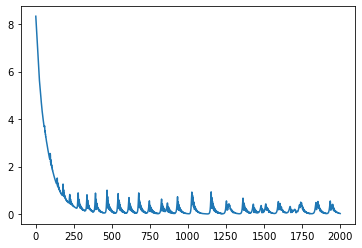

In [100]:
try:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Mean Absolute Error vs Epoch',fontsize = 15)
    plt.ylabel('Mean Absolute Error',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs Epoch',fontsize = 15)
    plt.ylabel('Accuracy',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('Loss vs Epoch',fontsize = 15)
    plt.ylabel('Loss',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [17]:
matrixodb = scipy.io.loadmat('./data/P5_odb_down.mat')
matrixstd = scipy.io.loadmat('./data/P5_std_down.mat')
P5odb = pd.DataFrame.from_dict(matrixodb['E_odb_down'])
P5std = pd.DataFrame.from_dict(matrixstd['E_std_down'])
P5odb['trig'] = np.ones((150))*1

In [18]:
df = pd.concat([P5odb, P5std])
df_shuffled = df.sample(frac=1, random_state=0)


In [19]:
X = df_shuffled.loc[:, df_shuffled.columns != 'trig'].to_numpy()
y = df_shuffled['trig'].to_numpy()